## Ex 4.1

_Calculate the number of minutes between today and the beginning of 2018_.

In [28]:
# Your answer
import datetime as dt
year_18 =  dt.datetime(year=2018, month=1, day=1)
now = dt.datetime.now()


dt.timedelta.total_seconds(now - year_18)//60

2297671.0

## Ex 4.2

_Calculate the monthly return and volatility for the stock Tesla (TSLA), and plot them. For the volatility, apply a rolling window of 20._

In [2]:
# Your answer
import yfinance as yf
import matplotlib.pyplot as plt
df = yf.download("TSLA")
df["pct return"] = df["Close"].pct_change()
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,pct return
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,NaN
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,-0.002512
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,-0.078472
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,-0.125683
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,-0.160938


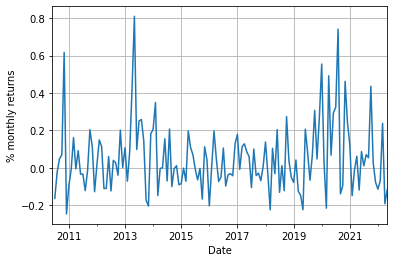

In [3]:
df['Close'].resample('M').ffill().pct_change().plot()
plt.ylabel('% monthly returns')
plt.grid()
plt.show()

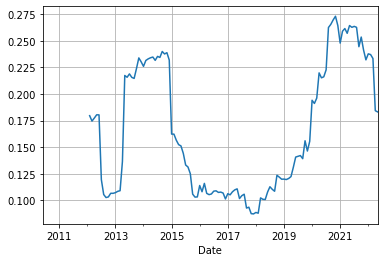

In [43]:
monthly_ret = df['Close'].resample('M').ffill().pct_change()
volatility = monthly_ret.rolling(20).std()
volatility.plot()
plt.grid()
plt.show()

## Ex 4.3

Calculate the correlation between the returns of the gold price (ticker 'GLD'), gold stocks (tickers 'NEM', 'FNV'), and gold ETF (ticker 'GDX').

In [36]:
# Your answer
df_gold = yf.download("GLD NEM FNV GDX")["Adj Close"]
df_gold.dropna(inplace=True)


[*********************100%***********************]  4 of 4 completed


In [37]:
df_gold.head()

,FNV,GDX,GLD,NEM
Date,,,,
2007-12-07,13.142975,41.597816,78.599998,38.895805
2007-12-10,13.073113,42.440521,80.000000,39.517780
2007-12-11,13.064375,41.176456,78.839996,38.165024
2007-12-12,12.994517,41.866776,80.489998,38.320503
2007-12-13,12.959585,40.387527,78.500000,37.955105


In [38]:
gld_pct_change = df_gold.pct_change()
gld_pct_change

,FNV,GDX,GLD,NEM
Date,,,,
2007-12-07,NaN,NaN,NaN,NaN
2007-12-10,-0.005315,0.020258,0.017812,0.015991
2007-12-11,-0.000668,-0.029784,-0.014500,-0.034232
2007-12-12,-0.005347,0.016765,0.020928,0.004074
2007-12-13,-0.002688,-0.035332,-0.024724,-0.009535
...,...,...,...,...
2022-05-09,-0.059918,-0.058703,-0.014479,-0.054206
2022-05-10,-0.005512,-0.016755,-0.008445,-0.009431
2022-05-11,-0.004690,-0.001262,0.008167,0.002197


In [40]:
gld_pct_change.corr()

,FNV,GDX,GLD,NEM
FNV,1.000000,0.769321,0.613520,0.673581
GDX,0.769321,1.000000,0.751324,0.874549
GLD,0.613520,0.751324,1.000000,0.665953
NEM,0.673581,0.874549,0.665953,1.000000
